# TP2 ANALYSE D'HISTOGRAMMES 
                                                                                                 Nom: haddar
                                                                                                 Prenom: skander
                                                                                                 Groupe: 2eme idsd2

## Introduction
Afficher une image n'est pas suffisant pour analyser son contenu. Pour extraire de l'information à partir de l’image, nous utilisons des outils d'aide à l'analyse tels que l’histogramme, le profil, le scanning. Dans ce TP, nous mettons l'accent sur l'histogramme dont l’usage est très répondu.


## I. Illustration sur une image synthétique
### 1. Histogramme
En statistiques, un histogramme est un graphique permettant de représenter la répartition d'une variable continue. Spécifiquement, en imagerie numérique, il permet de représenter la distribution des intensités de l'image c'est-à-dire le nombre de pixels (en ordonnée) pour chaque intensité lumineuse (en abscisse en allant du plus foncé au plus clair). A titre d'exemple, l’histogramme d’une image en 256 niveaux de gris comporte 256 valeurs en abscisses et le nombre de pixels de l'image en ordonnées.
* Génerer et afficher l'image **'im'** qui prend comme matrice: 

\begin{array}{ccc} 
1 & 1 & 0 & 0 \\
2 & 2 & 1 & 1 \\
0 & 3 & 2 & 2 \\
1 & 1 & 1 & 1 \end{array} 

* Afficher l'image **im**.
* Calculer l'histogramme **H** de l'image **im**.
* Afficher l’histogramme de l’image (utiliser la fonction **bar**).

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import operator as op
import skimage

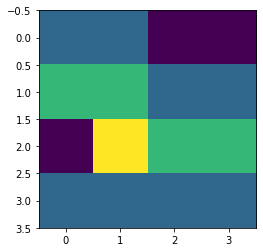

In [3]:
im= np.array([[1,1,0,0],[2,2,1,1],[0,3,2,2],[1,1,1,1]])
plt.imshow(im)
plt.show()


In [4]:
def histogramme_image(im):
    liste = im.tolist()    
    nv_l=[]
    for i in range (len(liste)):
        a=len(liste[i])
        for j in range(a):
            nv_l.append(liste[i][j])
    unique = set(nv_l)
    d={}
    for i in unique :
        d[i]=op.countOf(nv_l, i)
    plt.bar(d.keys(),d.values())
    return(d)


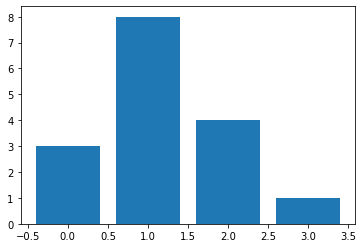

In [5]:
d=histogramme_image(im)

### 2. Histogramme cumulé
L'histogramme cumulé est un graphique qui représente le pourcentage de pixels noté $ HC(x_{k})$ (voir l’équation ci-dessous) de valeurs inférieures à un niveau d'intensité donné $x_{k}$. Il donne idée sur l'équilibre de la répartition des niveaux de couleurs, voir notamment si la pleine échelle des niveaux de couleur est utilisée.
où $H$ désigne le nombre de pixels d’intensité égale à $x_{j}$, $n$ et $m$ sont les dimensions de l’image en ligne et colonne.
$$ HC(x_{k})=\frac{\sum_{j=0}^{+k} H(x_{j})}{n*m} $$
* Reprenons le programme précédent:

[0.1875 0.6875 0.9375 1.    ]


<BarContainer object of 4 artists>

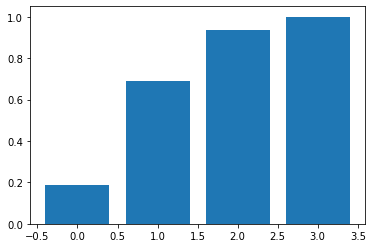

In [6]:
#calcul de l’histogramme cumulé
H=np.array(list(d.values()))
HC=np.zeros(shape=4,dtype=np.uint8)
HC[0]=H[0]
#print(H)
for i in range(1, 4):
    HC[i]=HC[i-1]+H[i]
HC=HC/(16)
print(HC) 
# afficher l’histogramme cumulé (fig)

plt.bar(d.keys(), HC)

## II. Illustration sur un cas réel
#### 1. Histogramme d’une image en couleurs
Considérer l’image couleur "**lena.bmp**".
*  Convertir l’image en niveaux de gris.
*  Redimensionner l’image à 100 x 100.
*  Calculer et afficher l’histogramme de l’image (utiliser les fonctions **np.histogram**,**bar**).
*  Calculer et afficher l’histogramme cumulé.(utiliser les fonctions **np.cumsum,bar**).

<BarContainer object of 256 artists>

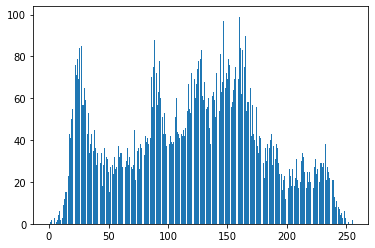

In [72]:
from skimage.transform import resize
lena= cv.imread(r"C:\Users\USER\Desktop\tous les tp\tp traitement d'image\TP2\lena.bmp")
lena_gray= cv.cvtColor(lena, cv.COLOR_BGR2GRAY)
resized_lena = resize(lena_gray, (100, 100))

h,x= np.histogram(resized_lena,256) 
plt.bar(range(0,256) , h)


<BarContainer object of 256 artists>

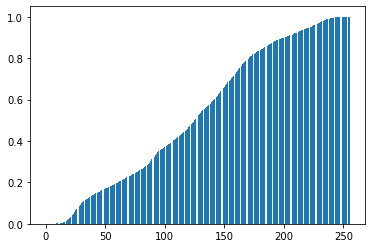

In [8]:
plt.bar(range(0,256),np.cumsum(h)/10000)

#### 2. Histogramme d’une image en couleurs
On considère maintenant l’image de chat **"chelsea"** en couleurs.
* Calculer l'histogramme correspondant pour chaque composante rouge, verte et bleue de l'image chelsea. (utiliser la fonction **exposure.histogram**)
* Afficher dans le même graphique les trois histogrammes calculés dans la deuxième question. 
* Interpréter les résultas obtenus.

Text(0.5, 1.0, 'red')

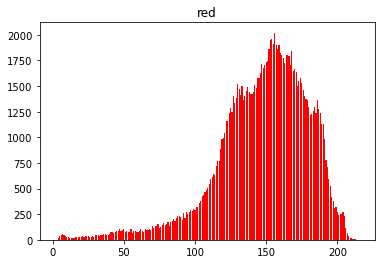

In [9]:
import skimage
chelsea= skimage.data.chelsea()
y1,x1=skimage.exposure.histogram(chelsea[:,:,0] ,nbins=256)
y2,x2=skimage.exposure.histogram(chelsea[:,:,1] ,nbins=256)
y3,x3=skimage.exposure.histogram(chelsea[:,:,2] ,nbins=256)
plt.bar(x1,y1 , color="red")
plt.title("red")

Text(0.5, 1.0, 'histogramme de tous les niveaux')

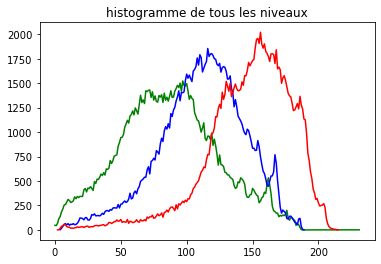

In [10]:
plt.plot(x3,y3 , color="green")
plt.plot(x2,y2,color="blue")
plt.plot(x1,y1 , color="red")

plt.title("histogramme de tous les niveaux")

Text(0.5, 1.0, 'blue')

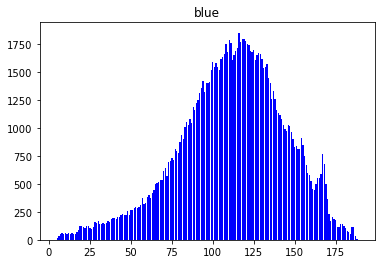

In [11]:
plt.bar(x2,y2,color="blue")
plt.title("blue")

Text(0.5, 1.0, 'red cumulé')

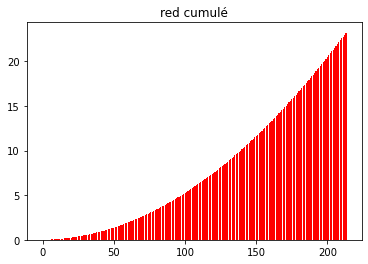

In [12]:
plt.bar(range(214),np.cumsum(x1)/1000 ,color="red")
plt.title("red cumulé")

Text(0.5, 1.0, 'blue cumulé')

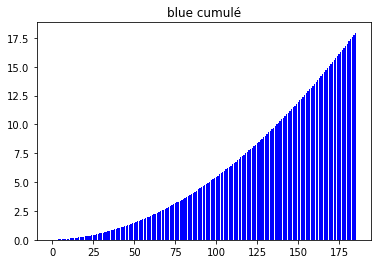

In [13]:
plt.bar(range(186),np.cumsum(x2)/1000 ,color="blue")
plt.title("blue cumulé")

Text(0.5, 1.0, 'green cumulé')

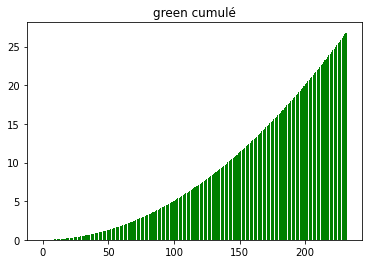

In [14]:
plt.bar(range(232),np.cumsum(x3)/1000 ,color="green")
plt.title("green cumulé")

## III. Modification de l’histogramme
Dans le cas où l’image traitée est surexposée (uniformément blanche) ou sous-exposée (uniformément noire), il est utile d'ajuster son contraste et l'échelle des couleurs pour mieux l’analyser. Ceci revient à modifier son histogramme sans pour autant altérer ses informations. Parmi les méthodes de modification de l’histogramme, nous citons le seuillage, l'étirement, l'égalisation et l'inversion.
#### 1. Seuillage
Le seuillage est l'opération qui, étant donnée une certaine valeur appelée seuil, met à zéros les pixels d'intensité inférieure au seuil et à 1 (ou 255) les pixels d'intensité supérieure au seuil. Le résultat est une image binaire. Le but du seuillage est de faire apparaître des formes ou des objets dans l'image. Cependant, sa principale difficulté est le choix et l'ajustement du seuil. 
Notons également qu'il est possible de considérer deux seuils. Ainsi, les pixels d'intensités
comprises entre ces deux seuils sont mis à 1 (ou 255) et les autres à 0. Ce seuillage est dit
passe-bande.
#### 2. Binarisation par seuillage Otsu
La méthode de seuillage Otsu permet d’obtenir une image binaire telle que les pixels ayant une valeur inférieure à un certain seuil prennent la valeur 0 et ceux qui présentent des valeurs supérieures à ce seuil prennent la valeur 1. Ce seuil peut être déterminé en utilisant la commande ‘threshold_otsu’.
* Calculer la valeur du seuil de l’image Camera pour la méthode Otsu. Utiliser la commande **'threshold_otsu’**.
*  Calculer l’histogramme de l’image étudiée et l’afficher. 
* Superposer une droite verticale en couleur rouge indiquant la valeur du seuil (calculé dans la question 1) sur l’histogramme (de la question 2). Utiliser les commandes **‘axvline’** et **‘color’**. 
* Calculer et afficher l’image binaire résultante en appliquant la méthode par seuillage Otsu.


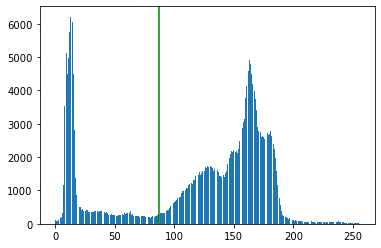

In [71]:
from skimage.filters import threshold_otsu

camera=skimage.data.camera()
thresh = threshold_otsu(camera)
h,x=np.histogram(camera,256)
plt.bar(range(0,256),h)
plt.axvline(thresh, color ='green', lw = 2, alpha = 0.75)


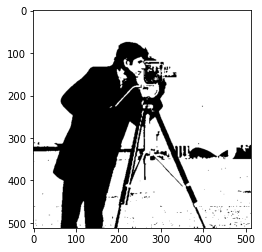

In [73]:
ret_h, th_h = cv.threshold(camera,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(th_h , cmap='gray')
plt.show() 


#### 3. Etirement de l’histogramme
Cette technique est utilisé lorsque l’image est trop claire, trop foncée ou peu contrastée (On appelle dynamique : l'intervalle $[a,b]$ Où a et b sont respectivement les niveaux de gris minimal et maximal présents dans l’image.

La dynamique maximale est répresenté par $[0,255]$. Par conséquence, le but du recadrage dynamique est de redistribuer les niveaux de gris de l’image pour qu’ils occupent toute la bande de nuances possible, c.-à-d. la dynamique maximale.
 
Cette opération consiste à répartir les fréquences d'apparition des pixels sur la largeur de
l'histogramme afin d'augmenter le contraste d'une image. Ceci revient à étendre l'histogramme
de manière que la valeur d'intensité la plus faible soit à zéro et la plus haute soit à la valeur
maximale.
Mathématiquement, l’étirement est une transformation linéaire $T$ qui s’applique sur les
valeurs $x$ des pixels de l’image. Ainsi,


$x \in\left[ x_{min}, x_{max} \right]  T(x)=g*x+d$
avec $d$ et $g$ deux constantes.

Considérer l’image couleur **"image_sombre.jpeg"**.
* lire et afficher l'image sombre au niveau de gris.
* Afficher les valeurs $x_{min}$ et $x_{max}$ de l’image.
* Calculer les valeurs $g,d$ sachant que 
$$g=\frac{255}{x_{max}-x_{min}}$$
$$d=\frac{x_{min}*255}{x_{max}-x_{min}}$$
* Etirer l’histogramme de l’image.
* Afficher  l’histogramme de l’image originale et l’image modifiée.
* Enregistrer l’image modifiée.

In [87]:
from skimage import io

In [110]:
sombre=io.imread(r"image_sombre.jpeg")

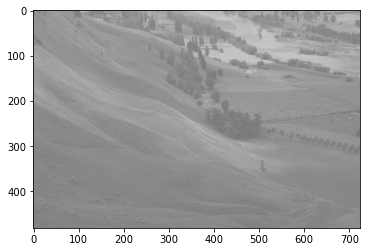

In [111]:
plt.imshow(sombre)
plt.show() 

In [112]:
minimum=sombre.min()
maximum=sombre.max()
print("le minimum est :",minimum)
print("le maximum est :", maximum)

le minimum est : 113
le maximum est : 209


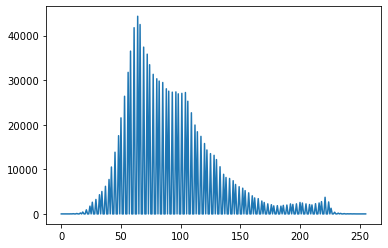

In [114]:
h,x=np.histogram(sombre,256)

plt.plot(range(0,256),h)


In [115]:
g=255/(maximum-minimum)
d=(minimum*255)/(maximum-minimum)

In [120]:

a=sombre[:,:,0]*g+d
b=sombre[:,:,1]*g+d
c=sombre[:,:,2]*g+d
img = a+ b +c

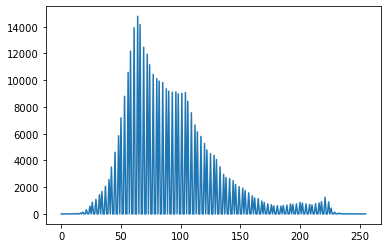

In [121]:
h,x=np.histogram(img,256)

plt.plot(range(0,256),h)


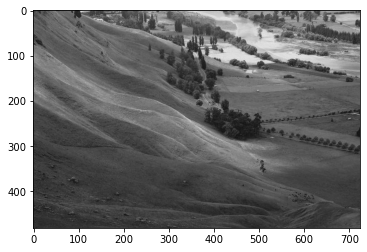

In [123]:
plt.imshow(img,cmap="gray")
plt.show() 